In [39]:
import yfinance as yf
import pandas as pd
import seaborn
import matplotlib.pyplot as plt


In [40]:
data = yf.Ticker("EPAM").history(start='2022-01-01', end='2023-01-31', interval='1d')

data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,670.320007,675.340027,638.119995,642.200012,433200,0.0,0.0
2022-01-04 00:00:00-05:00,641.210022,646.159973,607.950012,618.710022,509100,0.0,0.0
2022-01-05 00:00:00-05:00,605.849976,625.460022,587.109985,587.799988,581100,0.0,0.0
2022-01-06 00:00:00-05:00,579.450012,590.809998,570.479980,579.049988,616200,0.0,0.0
2022-01-07 00:00:00-05:00,578.929993,584.690002,555.010010,556.679993,471100,0.0,0.0


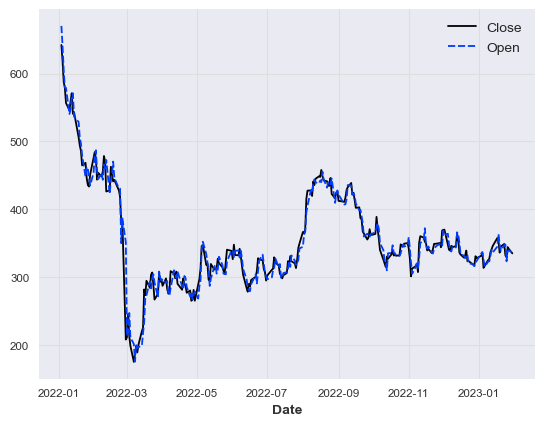

In [41]:
seaborn.lineplot(data=data[['Close', 'Open']])
plt.show()

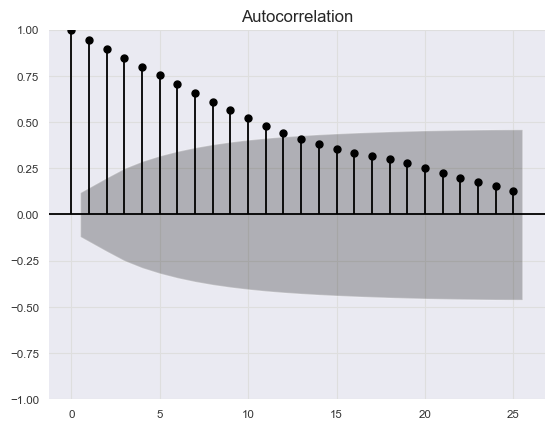

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Close'])
plt.show()

C:\Users\Giorgi\anaconda3\envs\torch-cuda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


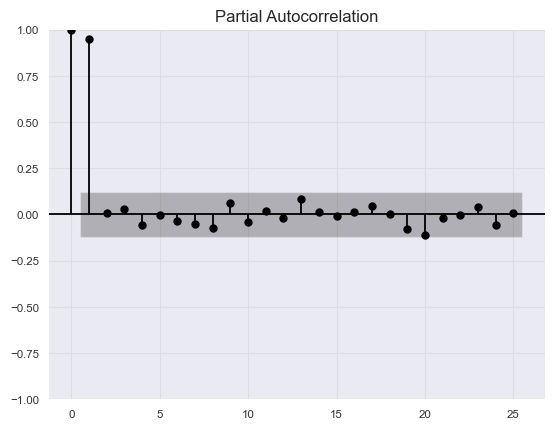

In [43]:
plot_pacf(data['Close'])
plt.show()

In [44]:
data = data.reset_index()
data['Date'] = data['Date'].values.astype('datetime64[D]')
data['Return'] = data['Close'].pct_change()
data = data[1:]
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return
1,2022-01-04,641.210022,646.159973,607.950012,618.710022,509100,0.0,0.0,-0.036577
2,2022-01-05,605.849976,625.460022,587.109985,587.799988,581100,0.0,0.0,-0.049959
3,2022-01-06,579.450012,590.809998,570.479980,579.049988,616200,0.0,0.0,-0.014886
4,2022-01-07,578.929993,584.690002,555.010010,556.679993,471100,0.0,0.0,-0.038632
5,2022-01-10,540.239990,545.859985,531.039978,545.849976,966600,0.0,0.0,-0.019455


In [52]:
from darts import TimeSeries

ts = TimeSeries.from_dataframe(data, 'Date', 'Return', fill_missing_dates=True, fillna_value=0, freq='D')

In [53]:
from darts.models import ExponentialSmoothing

train_split, val_split = ts.split_after(pd.Timestamp('2022-12-31'))

model = ExponentialSmoothing()
model.fit(train_split)

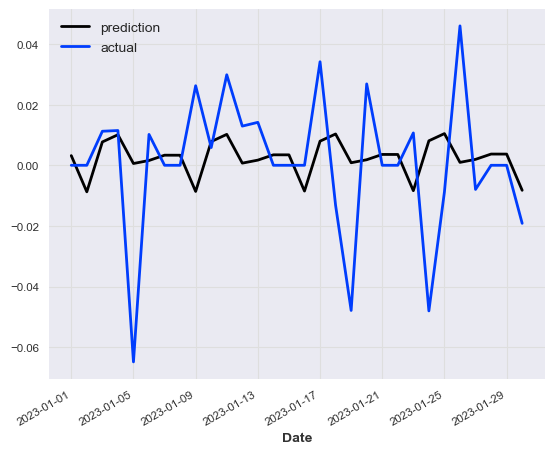

In [55]:
model.predict(len(val_split)).plot(label='prediction')
val_split.plot(label='actual')